In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dset

from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

In [ ]:
mnist_train = dset.MNIST(root="../", train = True, transform=transforms.ToTensor(),
                         target_transform = None, download = True)
mnist_test = dset.MNIST(root="../", train =False, transform=transforms.ToTensor(),
                        target_transform = None, download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 92733170.01it/s]


Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27362930.61it/s]

Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 28159969.53it/s]


Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4934091.89it/s]


Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw



In [ ]:
print(mnist_train.__getitem__(0)[0].size(), mnist_train.__len__())
print(mnist_test.__getitem__(0)[0].size(), mnist_test.__len__())

torch.Size([1, 28, 28]) 60000
torch.Size([1, 28, 28]) 10000


In [ ]:
train_loader = DataLoader(mnist_train,batch_size=batch_size, shuffle=True,
                          num_workers=2,drop_last=True)

test_loader = DataLoader(mnist_test,batch_size=batch_size, shuffle=False,
                         num_workers=2,drop_last=True)

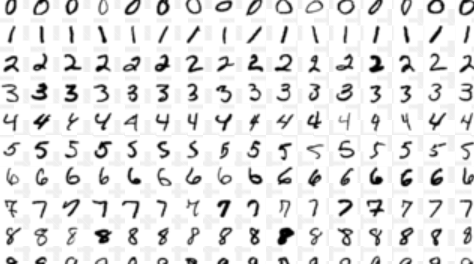

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()


        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )


        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )


        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )


        self.fc1 = nn.Linear(256, 100)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(100, 10)


    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


model = CNN().to(device)

loss_func = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

cuda:0


In [ ]:
loss_arr =[]
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_= label.to(device)

        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()

        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

tensor(2.3097, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4813, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2727, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1793, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1722, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1732, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1190, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1505, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0657, device='cuda:0', grad_fn=<NllLossBackward0>)


In [ ]:
correct = 0
total = 0


with torch.no_grad():

    for image,label in test_loader:


        x = image.to(device)
        y_= label.to(device)

        output = model.forward(x)

        _,output_index = torch.max(output,1)

        total += label.size(0)

        correct += (output_index == y_).sum().float()

    print("Accuracy of Test Data: {}%".format(100*correct/total))

Accuracy of Test Data: 97.53605651855469%
